
# Projeto: Regressão Linear Simples — Base de Dados de Futebol

**Arquivo da base:** `dados-completos-Ituano.csv`

## Integrantes do Grupo
> Preencha abaixo com os dados dos integrantes (nome completo, RA, e-mail):
- Caio Felipe de Lima Bezerra — RM 556197
- Djalma Moreira de Andrade Filho — RM 555530
- Felipe Paes de Barros Muller Carioba — RM 558447
- Marcos Vinicius da Silva Costa — RM 555490
- Rafael Federici de Oliveira — RM 554736


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("dados-completos-Ituano.csv")
df.head()


,time_alvo,ano,jogo,home_or_away,home_team,away_team,stadium,tournament,home_score,away_score,...,statistics_penalty_miss,statistics_own_goals,statistics_penalty_save,statistics_penalty_shootout_save,statistics_penalty_shootout_goal,statistics_penalty_shootout_miss,statistics_error_lead_to_a_shot,statistics_last_man_tackle,statistics_expected_goals,statistics_expected_assists
0,Ituano,2022,1,home,Ituano,Novorizontino,Estádio Municipal Dr. Novelli Junior,Paulista Série A1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ituano,2022,1,home,Ituano,Novorizontino,Estádio Municipal Dr. Novelli Junior,Paulista Série A1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ituano,2022,1,home,Ituano,Novorizontino,Estádio Municipal Dr. Novelli Junior,Paulista Série A1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ituano,2022,1,home,Ituano,Novorizontino,Estádio Municipal Dr. Novelli Junior,Paulista Série A1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ituano,2022,1,home,Ituano,Novorizontino,Estádio Municipal Dr. Novelli Junior,Paulista Série A1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inspeção Inicial da Base

In [2]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 71 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   time_alvo                                   3767 non-null   object 
 1   ano                                         3767 non-null   int64  
 2   jogo                                        3767 non-null   int64  
 3   home_or_away                                3767 non-null   object 
 4   home_team                                   3767 non-null   object 
 5   away_team                                   3767 non-null   object 
 6   stadium                                     3767 non-null   object 
 7   tournament                                  3767 non-null   object 
 8   home_score                                  3767 non-null   int64  
 9   away_score                                  3767 non-null   int64  
 10  home_manager

In [3]:

df.describe(include="all")


,time_alvo,ano,jogo,home_or_away,home_team,away_team,stadium,tournament,home_score,away_score,...,statistics_penalty_miss,statistics_own_goals,statistics_penalty_save,statistics_penalty_shootout_save,statistics_penalty_shootout_goal,statistics_penalty_shootout_miss,statistics_error_lead_to_a_shot,statistics_last_man_tackle,statistics_expected_goals,statistics_expected_assists
count,3767,3767.000000,3767.000000,3767,3767,3767,3767,3767,3767.000000,3767.000000,...,8.0,243.000000,4.0,1.0,7.0,2.0,242.000000,3.0,238.000000,81.000000
unique,1,NaN,NaN,2,48,52,47,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ituano,NaN,NaN,home,Ituano,Ituano,Estádio Municipal Dr. Novelli Junior,Brasileirão Série B,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3767,NaN,NaN,1904,1904,1863,1904,2541,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2023.198832,26.168304,NaN,NaN,NaN,NaN,NaN,1.367401,0.949562,...,1.0,0.020576,1.0,2.0,1.0,1.0,0.132231,1.0,0.105882,0.201975
std,NaN,0.952967,15.961262,NaN,NaN,NaN,NaN,NaN,1.179520,1.170583,...,0.0,0.142253,0.0,NaN,0.0,0.0,0.339444,0.0,0.233691,0.195387
min,NaN,2022.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,1.0,0.000000,1.0,2.0,1.0,1.0,0.000000,1.0,0.000000,0.010000
25%,NaN,2022.000000,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,1.0,0.000000,1.0,2.0,1.0,1.0,0.000000,1.0,0.000000,0.050000
50%,NaN,2023.000000,26.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,1.0,0.000000,1.0,2.0,1.0,1.0,0.000000,1.0,0.000000,0.160000
75%,NaN,2024.000000,40.000000,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,...,1.0,0.000000,1.0,2.0,1.0,1.0,0.000000,1.0,0.100000,0.260000



## Seleção das Variáveis (X, Y)

Para aplicar a **regressão linear simples**, selecionamos automaticamente o par de colunas **numéricas** com **maior correlação linear (em valor absoluto)**, evitando correlação de uma coluna com ela mesma.

> Você pode alterar manualmente as colunas definindo `X_col` e `Y_col` conforme desejar.


In [4]:
numeric_df = df.select_dtypes(include=[np.number]).copy()

assert numeric_df.shape[1] >= 2, "É necessário pelo menos 2 colunas numéricas para regressão linear simples."

corr = numeric_df.corr(numeric_only=True)

corr_unstack = corr.where(~np.eye(corr.shape[0], dtype=bool))
abs_corr_long = corr_unstack.abs().stack().sort_values(ascending=False)
(Y_col, X_col) = abs_corr_long.index[0]

Y_col, X_col, abs_corr_long.iloc[0]


('statistics_challenge_lost',
 'statistics_accurate_keeper_sweeper',
 np.float64(1.0))

## Ajuste do Modelo de Regressão Linear Simples

In [5]:
X = numeric_df[[X_col]].copy()
X = sm.add_constant(X)
Y = numeric_df[Y_col]

valid = X.notna().all(axis=1) & Y.notna()
X = X[valid]
Y = Y[valid]

model = sm.OLS(Y, X).fit()
model.summary()


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     statistics_challenge_lost   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 3.133e+31
Date:                       Mon, 01 Sep 2025   Prob (F-statistic):          8.09e-229
Time:                               09:37:14   Log-Likelihood:                 593.89
No. Observations:                         17   AIC:                            -1184.
Df Residuals:                             15   BIC:                            -1182.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -2.082e-17   4.33e-17     -0.480      0.638   -1.13e-16    7.15e-17
statistics_accurate_keeper_sweeper     1.0000   1.79e-16    5.6e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       45.188   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.909
Skew:                          -3.750   Prob(JB):                     9.28e-32
Kurtosis:                      15.062   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Intervalos de Confiança (IC) dos Parâmetros

In [6]:

conf_int = model.conf_int(alpha=0.05)
conf_int.columns = ["IC_2.5%", "IC_97.5%"]
conf_int


,IC_2.5%,IC_97.5%
const,-1.131796e-16,7.154623e-17
statistics_accurate_keeper_sweeper,1.000000e+00,1.000000e+00



**Descrição das saídas principais:**
- **coef**: estimativas dos parâmetros (intercepto e inclinação).
- **std err**: erro padrão das estimativas.
- **t**, **P>|t|**: estatística de teste t e p-valor (teste de hipótese H0: parâmetro = 0).
- **[0.025, 0.975]**: intervalos de confiança de 95% para os parâmetros.
- **R-squared**: coeficiente de determinação; proporção da variabilidade de `Y` explicada por `X`.
- **Adj. R-squared**: R² ajustado (para múltiplas variáveis, aqui é igual/semelhante).
- **F-statistic** e **Prob (F-statistic)**: teste conjunto do modelo (para regressão simples
  coincide com o teste t do coeficiente de inclinação).
- **Omnibus**, **Jarque-Bera**: testes de normalidade dos resíduos.
- **Durbin-Watson**: autocorrelação dos resíduos (ideal próximo de 2).


## Gráfico de Dispersão com a Reta de Regressão

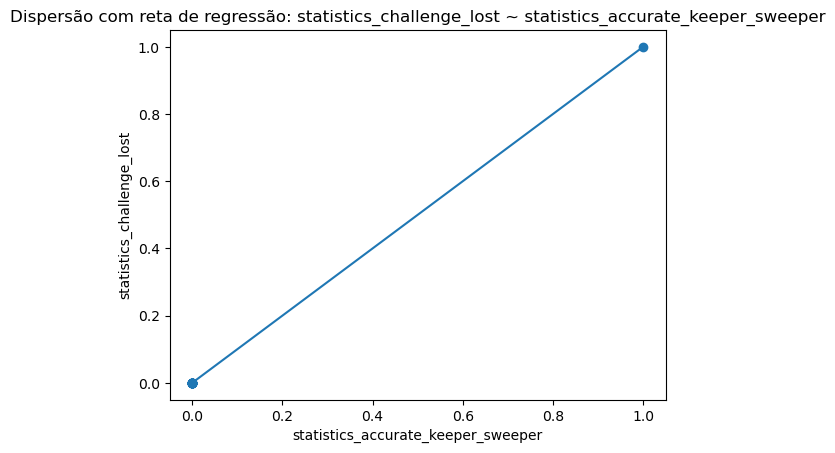

In [7]:

plt.figure()
plt.scatter(X[X_col], Y)
x_vals = np.linspace(X[X_col].min(), X[X_col].max(), 200)
y_hat = model.params["const"] + model.params[X_col] * x_vals
plt.plot(x_vals, y_hat)
plt.xlabel(X_col)
plt.ylabel(Y_col)
plt.title(f"Dispersão com reta de regressão: {Y_col} ~ {X_col}")
plt.show()


## Diagnóstico Rápido dos Resíduos (Opcional)

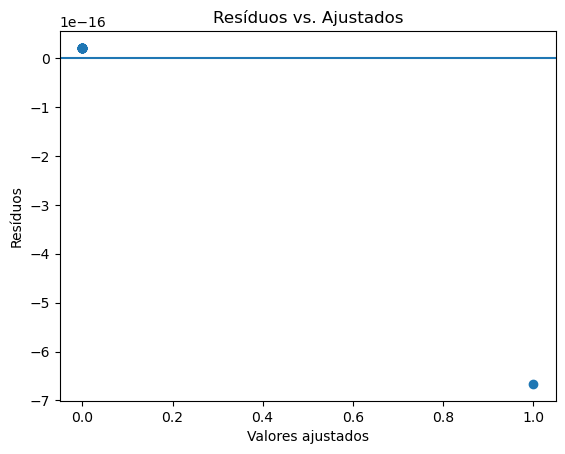

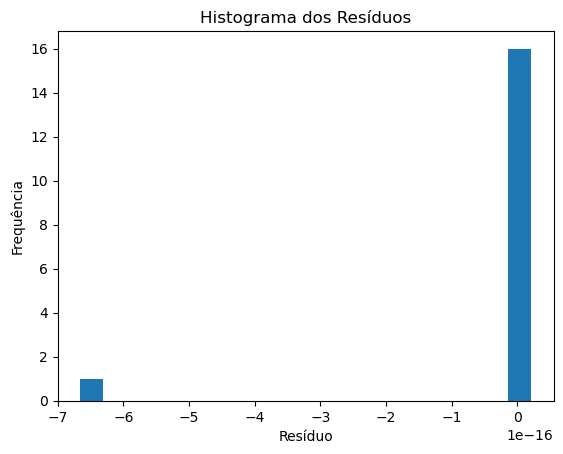

In [8]:

res = model.resid
fitted = model.fittedvalues

plt.figure()
plt.scatter(fitted, res)
plt.axhline(0)
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Ajustados")
plt.show()

plt.figure()
plt.hist(res.dropna(), bins=20)
plt.title("Histograma dos Resíduos")
plt.xlabel("Resíduo")
plt.ylabel("Frequência")
plt.show()
